In [18]:
import pandas as pd 
import fix_yahoo_finance as yf
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10 

plt.style.use('ggplot')

%matplotlib inline  
# %pylab inline

In [2]:
spy_data = yf.download('^GSPC', as_panel=False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
spy_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [5]:
spy_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17288.000000,17288.000000,17288.000000,17288.000000,17288.000000,1.728800e+04
mean,559.523096,562.823926,556.045908,559.657853,559.657853,9.079334e+08
std,662.879290,666.217241,659.300206,663.011809,663.011809,1.537506e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,85.690002,86.367503,84.997500,85.690002,85.690002,8.817500e+06
50%,165.364998,166.159996,164.665001,165.424995,165.424995,9.056000e+07
75%,1087.589966,1095.854981,1078.335022,1087.802460,1087.802460,1.154375e+09
max,2908.939941,2916.500000,2898.399902,2914.040039,2914.040039,1.145623e+10


In [6]:
def ajustado(df):
        dt=pd.DataFrame()
        lista=['Open','High','Low']
        for f in lista:
            dt[f]=(df[f]*df['Adj Close'])/df['Close']
        dt['Close']=df['Adj Close']
        dt['Volume']=df['Volume']
        return dt

In [7]:
spy = ajustado(spy_data)['2010':]

spy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


In [23]:
spy['Mes'] = spy.index.month
spy['Mes'] = spy.index.month
spy ['Dia_sem'] = spy.index.dayofweek
spy ['Retorno'] = spy.Close.pct_change()
spy ['Dia'] = spy.index.day

spy.tail()

,Open,High,Low,Close,Volume,Mes,Dia_sem,Retorno,Dia
Date,,,,,,,,,
2018-09-10,2881.389893,2886.929932,2875.939941,2877.129883,2731400000,9,0,0.001898,10
2018-09-11,2871.570068,2892.520020,2866.780029,2887.889893,2899660000,9,1,0.003740,11
2018-09-12,2888.290039,2894.649902,2879.199951,2888.919922,3264930000,9,2,0.000357,12
2018-09-13,2896.850098,2906.760010,2896.389893,2904.179932,3254930000,9,3,0.005282,13
2018-09-14,2906.379883,2908.300049,2895.770020,2904.979980,3149800000,9,4,0.000275,14


In [45]:
mes_dia = spy.pivot_table(values='Retorno', columns='Mes', index='Dia')
spy_mes = spy.groupby('Mes').Retorno.mean()

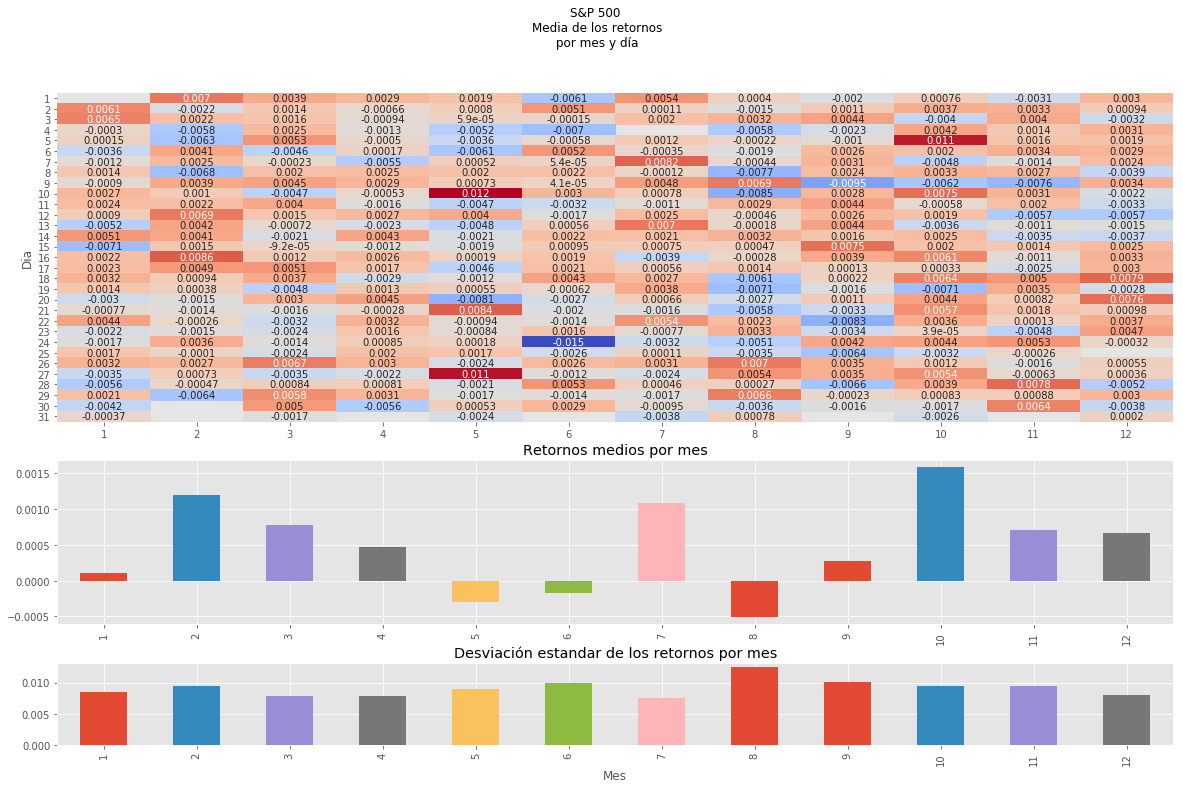

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20, 12), gridspec_kw = {'height_ratios':[4, 2, 1]})
fig.suptitle('S&P 500 \nMedia de los retornos\n por mes y día ')      
sns.heatmap(mes_dia, annot=True, cmap=plt.cm.coolwarm, cbar = False, ax=ax1)
ax1.axes.xaxis.set_label_text('')
ax2.set_title('Retornos medios por mes')
spy_mes.plot.bar(ax=ax2)
ax2.axes.xaxis.set_label_text('')
ax3.set_title('Desviación estandar de los retornos por mes')
spy.groupby('Mes').Retorno.std().plot.bar(ax=ax3)
plt.show()